# [FootShirt.com](https://www.footshirt.com)
![alt text](https://www.footshirt.com/assets/logo/footshirtlogo-small.png "FootShirt.com")

[FootShirt.com](https://www.footshirt.com) is the site for soccer fans that enjoy collecting jerseys and/or are passionate by the history and values communicated by soccer shirts. 

Managing your jerseys collection can not be easier. Easily add your jerseys to your digital closet. Browse through the available jerseys or add your own. 
Add the jerseys you plan to buy or receive as a gift to your Wishlist that you can share with friends and family. 

Read our blog that features articles about soccer shirts. Do you think you know everything about soccer jerseys? Try our quizzes and compete with other 
fans around the world to be on the top of the leaderboard.



# Introduction

The goal of this notebook is to demonstrate the use of data visualization techniques and libraries while using hopefully a fun dataset. We will focus on Soccer Jersey Dominant Color in this notebook and create many 3D scatter plots.

# Dataset

## Home, Away and Third Jerseys
For a very long time, soccer teams had only two jerseys referenced as Home and Away. These two jersey types had very distinct colors in case two teams having the same main color were playing against each other (think Manchester United versus Liverpool Red Jerseys). It's worth mentioning that many teams have still an Away jersey with white as the dominant color, likely a heritage from the black and white TV era.

Third Jerseys started appearing 20 years ago. Teams are using them if both their first-choice and away colors are deemed too similar to those of an opponent. It's also believed to be a way for kit suppliers to increase sales by offering designs that appeal to younger generations (bright colors, etc…). Recently, Third Jerseys have been mainly used for the Away games in the European Cups.

## Records
The dataset has around 3,200 records (i.e. jerseys) covering 156 teams (104 Clubs and 52 National Teams). Some teams might have only 1 jersey in the dataset while other popular teams such as Manchester United will have 104 jerseys. In addition, the recent period is more represented compared to other periods: 2,034 jerseys for 2005–2019 vs 1,198 jerseys for the period pre-2005.

This will introduce a bias toward popular teams, the recent past, the Home jersey in some analysis. Goalkeeper jerseys have been excluded in most analyses and visualizations.

## Fields Description
| Field                 | Description   | Example/Value
| --------------------- | --- | ---
| **id**                | jersey unique id                                    | 1, 2, 3
| **team_id**           | team unique id                                      | 1, 2, 3
| **teamname**          | team name                                           | Boca Juniors
| **teamtype**          | team type                                           | Club, National   
| **teamcountry**       | team country                                        | Argentina
| **homeawaythird**     | jersey type                                         | Home, Away, Third, Goalkeeper  
| **season**            | season                                              | 2018-2019
| **image_caption**     | concatenation of team name, season, and jersey type | Boca Juniors 2018-2019 Home
| **image_color**       | jersey dominant color                               | rgb(50,72,81)
| **image_r**           | jersey dominant color red component                 | Number between 0 and 255, e.g. 50  
| **image_g**           | jersey dominant color green component               | Number between 0 and 255, e.g. 72
| **image_b**           | jersey dominant color blue component                | Number between 0 and 255, e.g. 81
| **image_content_url** | Jersey image URL                                    | https://
| **brand_id**          | kit supplier unique id                              | 1, 2, 3
| **brandname**         | kit supplier                                        | Adidas, Nike, Puma

Each jersey is assigned one (and only one) dominant color. We will use the RGB Color model in which each parameter (Red, Green, and Blue) defines the intensity of the color as an integer between 0 and 255.A future analysis will handle several dominant colors to take into account shirts such as Juventus Turin jerseys where both black and white can be considered as dominant colors.

# Import

In [1]:
import pandas as pd
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams # for customizing Matplotlib
from mpl_toolkits.mplot3d import Axes3D # for 3D Scatter Plot
import seaborn as sns; sns.set()  # for plot styling

# Plotly
import plotly.plotly as py
import plotly.graph_objs as go

# IPython
from IPython.display import HTML, display

# Configure Matplotlib

In [2]:
# to render the figure in a notebook
%matplotlib inline
# Set Matplotlib default padding for title label to 20 points
rcParams["axes.titlepad"] = 20
# Set Matplotlib default padding for axis label to 5 points
rcParams["axes.labelpad"] = 10
# Set Matplotlib default background color to white
rcParams["figure.facecolor"] = "w"

# Load Dataset


In [3]:
JERSEYS_COLORS_FILENAME = "jerseys_colors.csv"
df_jerseys = pd.read_csv(JERSEYS_COLORS_FILENAME, sep=",")

# Soccer Shirts Dominant Colors
The chart below show dominant colors for the entire FootShirt.com database, i.e about 3,000 jerseys. It"s worth noticing 
that very few teams play in green

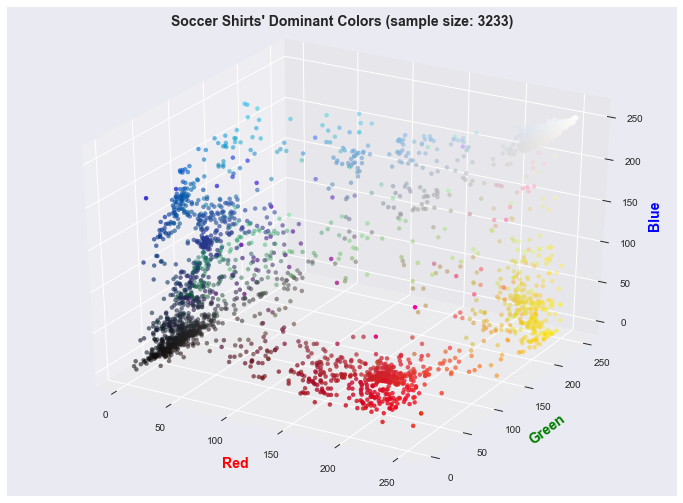

In [4]:
# Store the 3 columns with the RGB parameters in a Numpy array
X = df_jerseys[["image_r", "image_g", "image_b"]].values
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X/255.0, s=20, edgecolors="none")

# Set the axis labels, Rotate the Z label
ax.set_xlabel("Red", fontsize=14, fontweight="bold", color="r")
ax.set_ylabel("Green",  fontsize=14, fontweight="bold", color="g")
ax.set_zlabel("Blue",  fontsize=14, fontweight="bold", color="b", rotation=90)

# Set the title
title = "Soccer Shirts' Dominant Colors (sample size: {})".format(len(df_jerseys))
ax.set_title(title , fontsize=14, fontweight="bold")

plt.show()

# Soccer Shirts Dominant Colors for the 2018 Fifa World Cup Russia

The 2018 Fifa World Cup Russia was featuring 32 teams, each team had a Home Jersey and a Away Jersey (so the dataset has 64 jerseys, each having a dmoninant color

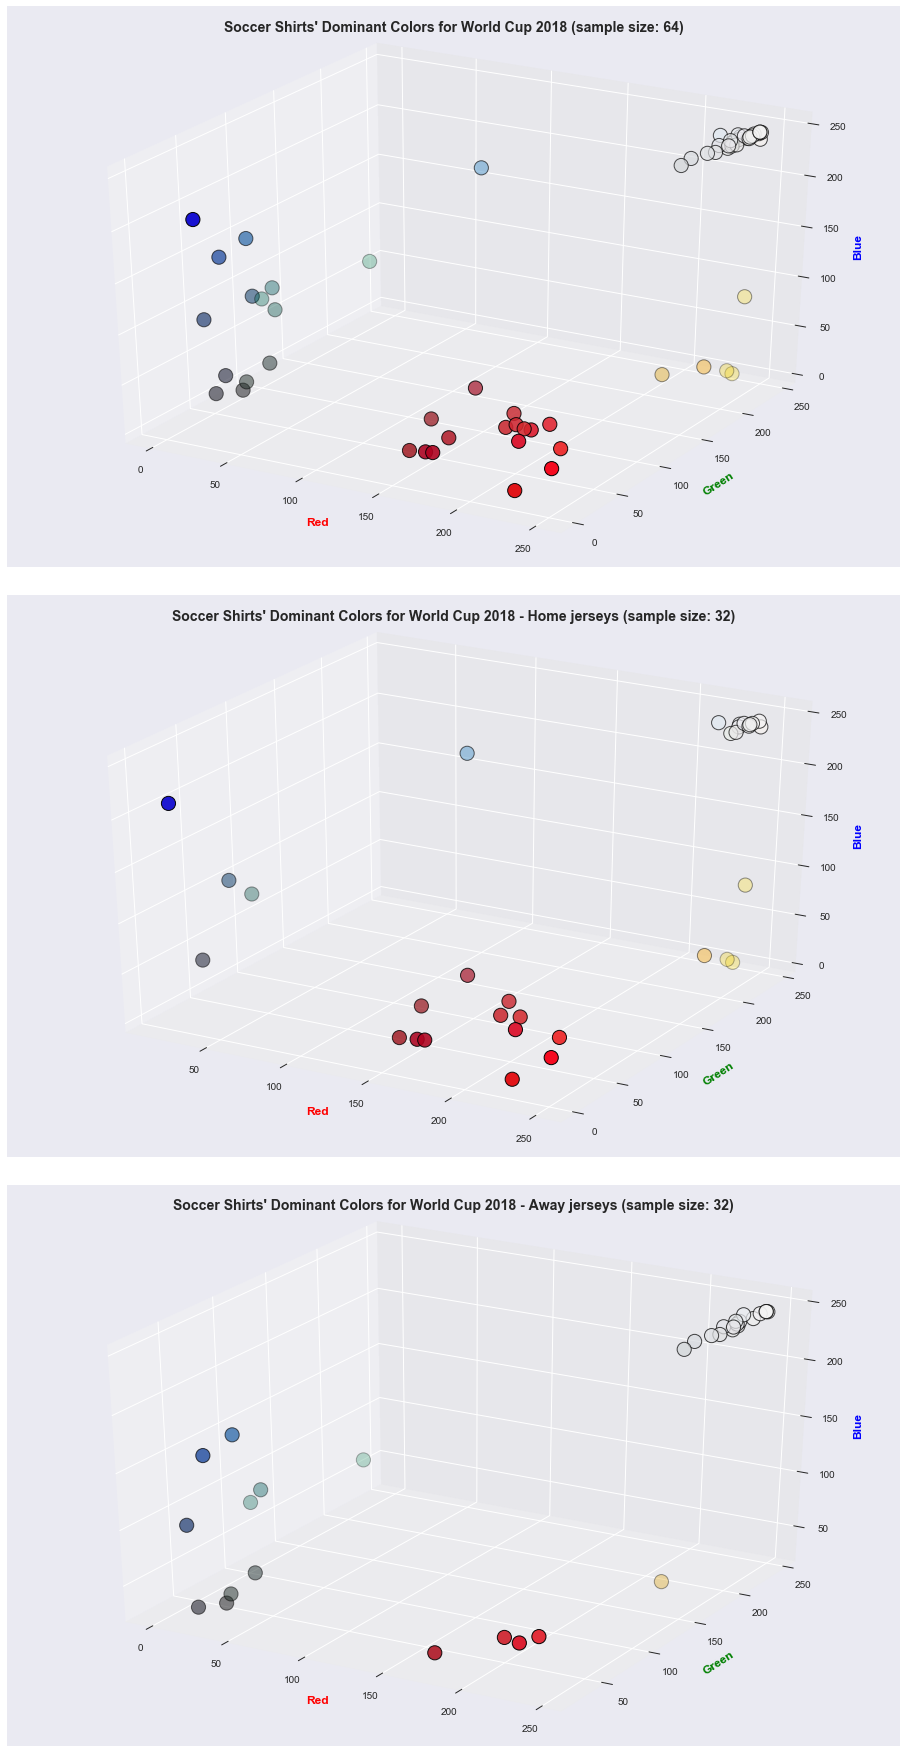

In [5]:
# Define the scope
teamnames = ["Argentina", "Australia", "Belgium", "Brazil", "Colombia", "Costa Rica", "Croatia", "Denmark", "Egypt", 
             "England", "France", "Germany", "Iceland", "Iran", "Japan", "South Korea", "Mexico", "Morocco", 
             "Nigeria", "Panama", "Peru", "Poland", "Portugal", "Russia", "Saudi Arabia", "Senegal", "Serbia", 
             "Spain", "Sweden", "Switzerland", "Tunisia", "Uruguay"]
season = "2018"
jersey_types = ["Home", "Away"]


fig = plt.figure(figsize=(16,32))
fig.subplots_adjust(hspace=0.05, wspace=0.01)

df_jerseys_wc_2018 = df_jerseys[(df_jerseys["teamname"].isin(teamnames)) & (df_jerseys["homeawaythird"].isin(jersey_types)) &
    (df_jerseys["season"] == "2018")]
X = df_jerseys_wc_2018[["image_r", "image_g", "image_b"]].values
ax = fig.add_subplot(311, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X/255.0, s=200, linewidths=1, edgecolors="k")
ax.set_xlabel("Red", fontsize=12, fontweight="bold", color="r")
ax.set_ylabel("Green",  fontsize=12, fontweight="bold", color="g")
ax.set_zlabel("Blue",  fontsize=12, fontweight="bold", color="b", rotation=90)
title = "Soccer Shirts' Dominant Colors for World Cup 2018 (sample size: {})".format(len(df_jerseys_wc_2018))
ax.set_title( title, fontsize=14, fontweight="bold")
 
i = 1
for jersey_type in jersey_types:
    df_colors_type = df_jerseys[(df_jerseys["teamname"].isin(teamnames)) & (df_jerseys["homeawaythird"] == jersey_type) &
    (df_jerseys["season"] == "2018")]
    X = df_colors_type[["image_r", "image_g", "image_b"]].values
    ax = fig.add_subplot(len (jersey_types)+1, 1, i + 1, projection="3d")
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X/255.0, s=200, linewidths=1, edgecolors="k")
    ax.set_xlabel("Red", fontsize=12, fontweight="bold", color="r")
    ax.set_ylabel("Green",  fontsize=12, fontweight="bold", color="g")
    ax.set_zlabel("Blue",  fontsize=12, fontweight="bold", color="b", rotation=90)
    title = "Soccer Shirts' Dominant Colors for World Cup 2018 - {} jerseys (sample size: {})".format(jersey_type,len(df_colors_type))
    ax.set_title(title , fontsize=14, fontweight="bold")
    i += 1




# Focus on Liverpool

The 2018 Fifa World Cup Russia was featuring 32 teams, each team had a Home Jersey and a Away Jersey (so the dataset has 64 jerseys, each having a dmoninant color

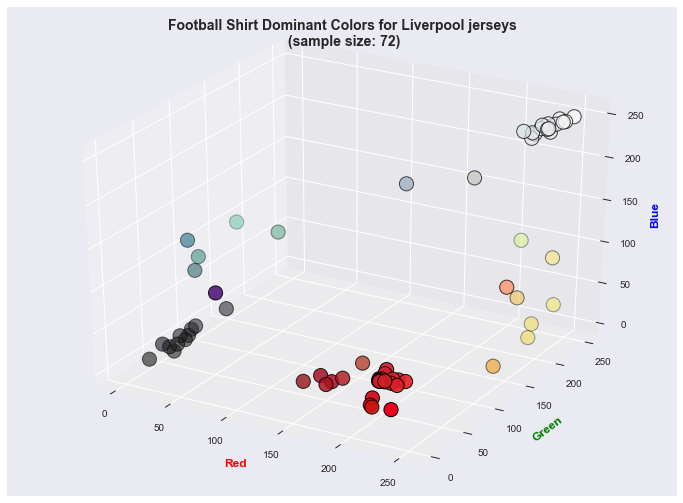

In [6]:
# Filter on Liverpool jersey
teamname = "Liverpool"
jersey_types = ["Home", "Away", "Third"]

df_jerseys_liverpool = df_jerseys[(df_jerseys["teamname"]==teamname) & (df_jerseys["homeawaythird"].isin(jersey_types))]
X = df_jerseys_liverpool[["image_r", "image_g", "image_b"]].values
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X/255.0, s=200, linewidths=1, edgecolors="k")
ax.set_xlabel("Red", fontsize=12, fontweight="bold", color="r")
ax.set_ylabel("Green",  fontsize=12, fontweight="bold", color="g")
ax.set_zlabel("Blue",  fontsize=12, fontweight="bold", color="b", rotation=90)
title = "Football Shirt Dominant Colors for {} jerseys\n (sample size: {})".format(teamname,len(df_jerseys_liverpool))
ax.set_title(title, fontsize=14, fontweight="bold", pad=0)
plt.show()


# Comparison between two teams

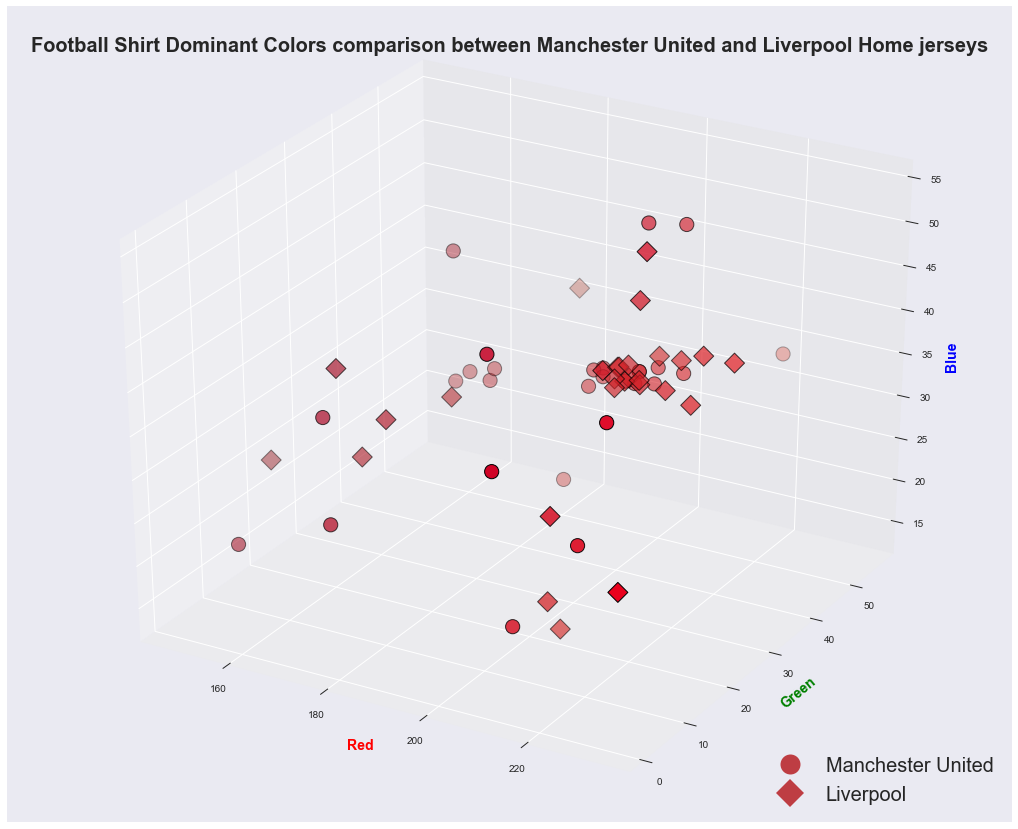

In [9]:
teamnames = ["Manchester United", "Liverpool"]
# Define the Jersey Type that we will use for the comparison
jersey_type = "Home"

fig = plt.figure(figsize=(18,15))

# Filter on the first team and the jersey type
df_jerseys_team1 = df_jerseys[(df_jerseys["teamname"]== teamnames[0]) & (df_jerseys["homeawaythird"] == jersey_type)]
X = df_jerseys_team1[["image_r", "image_g", "image_b"]].values

# Filter on the second team and the jersey type
df_jerseys_team2 = df_jerseys[(df_jerseys["teamname"]== teamnames[1]) & (df_jerseys["homeawaythird"] == jersey_type)]
Y = df_jerseys_team2[["image_r", "image_g", "image_b"]].values

# Plot the 3D scatter plot
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X/255.0, s=200, marker ="o", linewidths=1, edgecolors="k")
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=Y/255.0, s=200, marker ="D", linewidths=1, edgecolors="k")
ax.set_xlabel("Red", fontsize=14, fontweight="bold", color="r")
ax.set_ylabel("Green",  fontsize=14, fontweight="bold", color="g")
ax.set_zlabel("Blue",  fontsize=14, fontweight="bold", color="b", rotation=90)
ax.set_title( "Football Shirt Dominant Colors comparison between "+ teamnames[0] + " and " + teamnames[1] + " " +  jersey_type + " jerseys", fontsize=20, fontweight="bold")

# Trick to display the legend for a 3D Scatter plot
scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c=(0.70, 0.07, 0.09, 0.8), marker = "o", markersize=20)
scatter2_proxy = plt.Line2D([0],[0], linestyle="none", c=(0.70, 0.07, 0.09, 0.8), marker = "D", markersize=20)
ax.legend([scatter1_proxy, scatter2_proxy], teamnames, numpoints = 1, fontsize=20, loc="lower right")

# HTML Table
Nice trick to display colors

In [10]:
#Display a HTML table with jersey name, picture and dominant color
def display_jersey_table(df):
    
    data = df.values
    html_str = "<table><tr><th>Jersey</th><th>Picture</th><th>Color</th></tr>"
    for x in range(0, data.shape[0]):
        html_str = html_str + "<td>{}</td>".format(data[x][0])
        html_str = html_str + "<td><img src=\"{}\"  height=42 width=42></td>".format(data[x][1])
        html_str = html_str + "<td style=\"background-color:{}\"></td></tr>".format(data[x][2])
    html_str = html_str + "</table>"
    
    display(HTML(html_str))

In [11]:
# Use previous function to display shades of red for recent Liverpool Home jerseys
df_jerseys_liverpool_home = df_jerseys[(df_jerseys["teamname"] == 'Liverpool') & (df_jerseys["homeawaythird"] == 'Home')][:9]
display_jersey_table(df_jerseys_liverpool_home[["image_caption", "image_content_url", "image_color"]])

Jersey,Picture,Color,Liverpool 2018-2019 Home,,,Liverpool 2017-2018 Home,,,Liverpool 2016-2017 Home,,,Liverpool 2015-2016 Home,,,Liverpool 2014-2015 Home,,,Liverpool 2013-2014 Home,,,Liverpool 2012-2013 Home,,,Liverpool 2011-2012 Home,,,Liverpool 2010-2012 Home,,


# Plotly


In [12]:
X = df_jerseys_liverpool[["image_r", "image_g", "image_b"]].values
caption = df_jerseys_liverpool["image_caption"].values
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()

trace1 = go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    mode='markers',
    marker=dict(
        size=12,
        color=X, # set color to an array/list of desired values
        opacity=1
    ),
    text= caption
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Interactive Soccer Jersey')